W (Basis Matrix):
[[0.         0.         0.01141911 0.01322837 0.        ]
 [0.         0.         0.01182518 0.00721457 0.00019557]
 [0.         0.         0.04814645 0.01259111 0.00011745]
 ...
 [0.00332222 0.         0.01657956 0.00139969 0.        ]
 [0.00397133 0.         0.02872505 0.00134903 0.        ]
 [0.         0.00421991 0.0234565  0.01015073 0.        ]]
H (Coefficient Matrix):
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.01726563e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.40993314e-03 4.59622578e-02 4.53986149e-02 ... 1.81937893e-03
  1.09602362e-02 6.49464006e-04]
 [2.32109105e-03 0.00000000e+00 0.00000000e+00 ... 4.03489274e-04
  1.01006893e+00 0.00000000e+00]
 [6.24321159e-05 0.00000000e+00 0.00000000e+00 ... 8.05091963e-06
  3.46075006e-04 0.00000000e+00]]


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


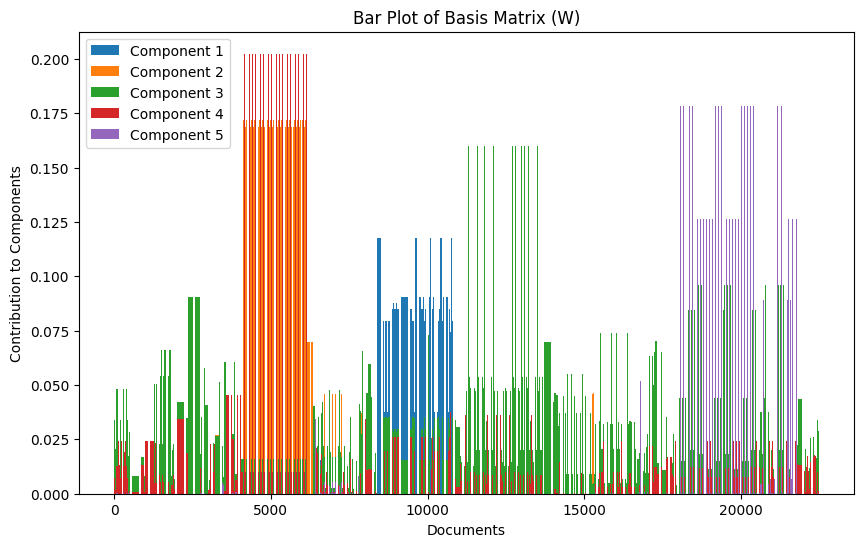

<Figure size 800x600 with 0 Axes>

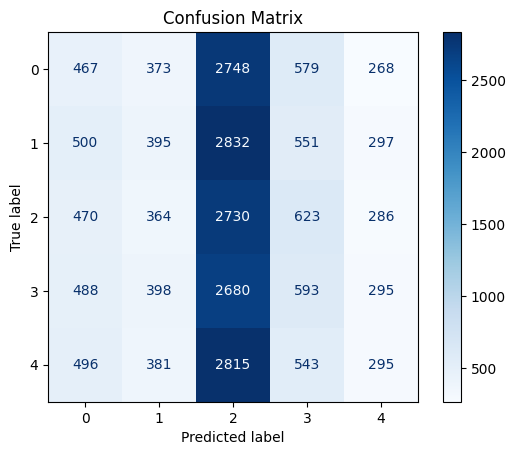

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv(r"C:\Users\HP\Desktop\Medicine_description.csv")

# Step 2: Handle missing values in the 'Description' column
data = data.dropna(subset=['Description'])

# Step 3: Vectorize the 'Description' column
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Description'])

# Step 4: Normalize the data
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

# Step 5: Perform NMF
nmf_model = NMF(n_components=5)  # Choose the number of components
W = nmf_model.fit_transform(X_normalized)
H = nmf_model.components_

# Step 6: Result interpretation
print("W (Basis Matrix):")
print(W)
print("H (Coefficient Matrix):")
print(H)

# Optional: Display the feature names
feature_names = vectorizer.get_feature_names_out()

# Step 7: Visualizations


# 7.1 Bar Plot of the Basis Matrix (W)
plt.figure(figsize=(10, 6))
for i in range(W.shape[1]):
    plt.bar(range(W.shape[0]), W[:, i], label=f'Component {i+1}')
plt.title('Bar Plot of Basis Matrix (W)')
plt.xlabel('Documents')
plt.ylabel('Contribution to Components')
plt.legend()
plt.show()

# Step 8: Simulate True Labels for Components
# For demonstration, let's assume we have 5 true classes for the components
true_labels = np.random.randint(0, 5, size=W.shape[0])  # Simulated true labels for each document

# Step 9: Assign Predicted Labels based on the Component with the Highest Contribution
predicted_labels = np.argmax(W, axis=1)

# Step 10: Create and visualize the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=[0, 1, 2, 3, 4])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()